Author: Thibeau Wouters

# Physical Modelling of Complex Systems: Assignment 1

##### Import packages

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import scipy as scipy

Configure matplotlib settings:

In [2]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     'font.serif': 'Modern Roman',
     "figure.figsize": (8, 4),
    "axes.titlesize" : 26,
    "axes.labelsize" : 28,
    "lines.linewidth": 3,
    "lines.markersize" : 10,
     "legend.fontsize": 16,
    "xtick.labelsize" : 24,
    "ytick.labelsize" : 24})

##### Define functions

ODE solver by discretising time.

In [3]:
def solve_ODE(f, t_vals, N0):
    '''Solves an ODE numerically by approximating as given in Assignment. Assume t_vals is list of times, equally spaced from each other.'''
    
    # Create empty list to save calculated values
    y_vals = []
    # Get the value of Delta t for calculations
    DeltaT = abs(t_vals[1] - t_vals[0])
    
    for t in t_vals:
        if t == t_vals[0]:
            # Initial condition
            y_vals.append(N0)
            
        else:
            # Compute next value: discretised derivative
            val = y_vals[-1] + f(y_vals[-1])*DeltaT
            y_vals.append(val)
            
    return y_vals

# 1.1 - Logistic Growth

### 1.1.1 - Exact solution

The exact solution is saved in the following function (see report).

In [4]:
def logistic(t, N0 = 10, alpha = 3, K = 10**3):
    return K/(1+(K - N0)/N0*np.exp(-alpha*t))

### 1.1.2 - Solving logistic equation numerically

In [5]:
# Define RHS of the differential equation
def logistic_func(N, alpha = 3, K = 10**3):
    return alpha*N*(1-N/K)

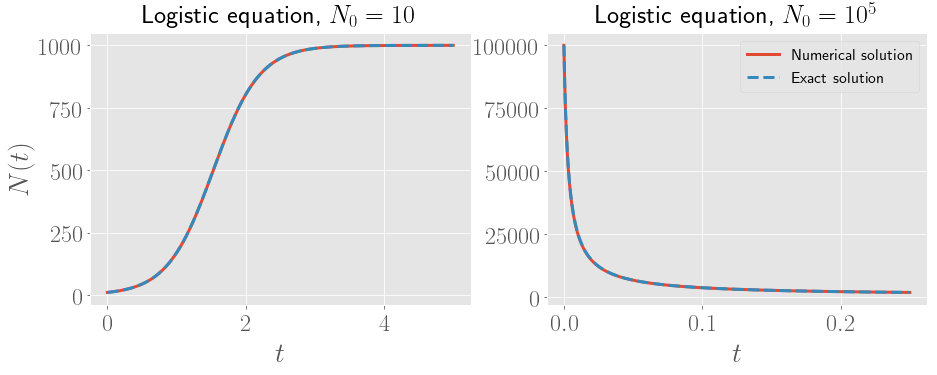

In [6]:
## Create one large figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

# Define lists to simplify subplotting
ax_list = [ax1, ax2]
N0_list = [10, 10**5]
t_list = [np.arange(0, 5, 10**(-4)), np.arange(0, 0.25, 10**(-4))]
title_list = [r'Logistic equation, $N_0 = 10$', r'Logistic equation, $N_0 = 10^5$']

for i in [0, 1]:
    t = t_list[i]; N0 = N0_list[i]; ax = ax_list[i]; title = title_list[i]
    
    # Solve ODE 1/ numerically and  2/ exactly 
    N_numeric = solve_ODE(logistic_func, t, N0)
    N_exact = logistic(t, N0 = N0)
    
    # Plot it and make fancy
    ax.plot(t, N_numeric, label = 'Numerical solution')
    ax.plot(t, N_exact, "--", label = 'Exact solution')
    
    ax.set_title(title)
    ax.set_xlabel(r'$t$')

ax1.set_ylabel(r'$N(t)$')
plt.legend(loc = 'upper right')
plt.savefig('logistic_equation_both.pdf', bbox_inches = 'tight')
plt.show()

### 1.1.3 - Linear stability analysis

For the linear stability analysis, I will make a fit to check the assertions made in the report.

In [7]:
def straight_line(t, A, B):
    '''Plots straight line with intercept A and slope B.'''
    return A + B*t

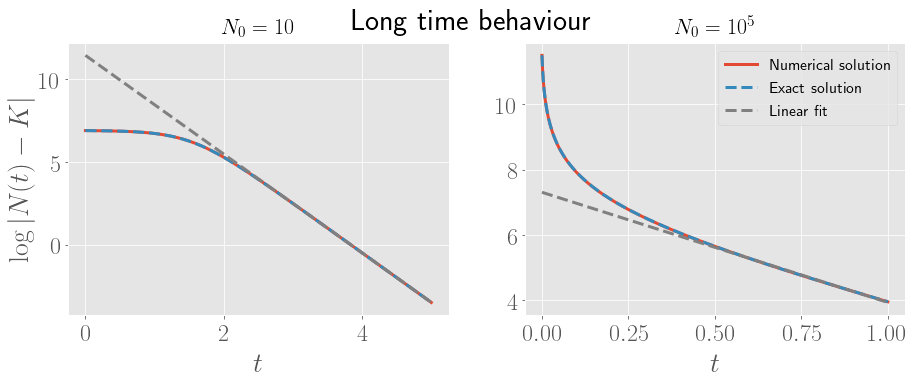

In [8]:
## Create one large figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Long time behaviour', fontsize = 30)
K = 10**3

# Empty list to save slopes of fits later
slopes_fit = []

# Define lists to simplify subplotting
ax_list = [ax1, ax2]
N0_list = [10, 10**5]
t_list = [np.arange(0, 5, 10**(-4)), np.arange(0, 1, 10**(-4))]
title_list = [r'$N_0 = 10$', r'$N_0 = 10^5$']

for i in [0, 1]:
    t = t_list[i]; N0 = N0_list[i]; ax = ax_list[i]; title = title_list[i]
    
    # Solve ODE 1/ numerically and 2/ exactly; obtain eta values
    N_numeric = solve_ODE(logistic_func, t, N0)
    eta_numeric = [np.log(abs(N - K)) for N in N_numeric]

    N_exact = logistic(t, N0 = N0)
    eta_exact = [np.log(abs(N - K)) for N in N_exact]
    
    # Get values to fit a straight line
    
    index = round(len(t)/2) # start from halfway the plot to get the fit (see figures below why)
    fit = np.polynomial.polynomial.Polynomial.fit(t[index:], eta_exact[index:], deg = 1) # make linear fit, so degree = 1
    A, B = fit.convert().coef
    line = straight_line(t, A, B)
    slopes_fit.append(B) # save the slope for later

    # Plot it, and make fancy
    ax.plot(t, eta_numeric, label = 'Numerical solution')
    ax.plot(t, eta_exact, "--", label = 'Exact solution')
    ax.plot(t, line, "--", color = 'grey', label = 'Linear fit')
    
    ax.set_title(title, fontsize = 22)
    ax.set_xlabel(r'$t$')

ax1.set_ylabel(r'$\log|N(t) - K|$')
plt.legend(loc = 'upper right')
plt.savefig('logistic_stability_analysis.pdf', bbox_inches = 'tight')
plt.show()

In [9]:
print('The slopes in the fit above are %0.4f for the left plot, %0.4f for the right plot.' % (slopes_fit[0], slopes_fit[1]))

The slopes in the fit above are -2.9873 for the left plot, -3.3781 for the right plot.


## 1.2 - Sustained harvesting

Define the RHS of the differential equations for the two scenarios.

In [10]:
def harvesting_effort(N, alpha = 3, K = 10**3, E = 2):
    # Stable fixed point: E < alpha
    
    return -(alpha/K)*N**2 + (alpha - E)*N

In [11]:
def harvesting_yield(N, alpha = 3, K = 10**3, Y0 = 500):
    # Stable fixed point: Y0 < alpha*K/4
    
    return -(alpha/K)*N**2 + alpha*N - Y0

Now, we plot the $f(N)$ functions below:

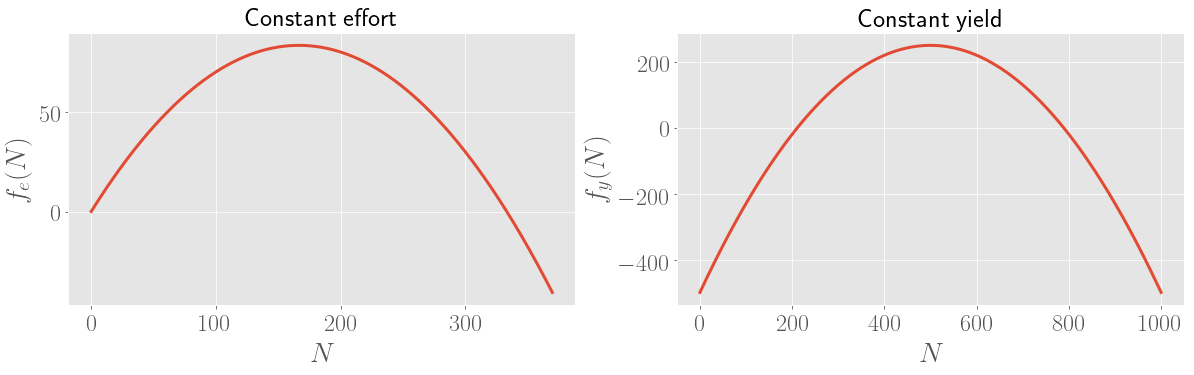

In [12]:
## Create one large figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 5))

# Define lists to simplify subplotting
ax_list = [ax1, ax2]
N_list = [np.arange(0, 370, 0.1), np.arange(0, 1000, 0.1)]
ylabel_list = [r'$f_e(N)$', r'$f_y(N)$']
title_list = ['Constant effort', 'Constant yield']
func_list = [harvesting_effort, harvesting_yield]

for i in [0, 1]:
    N = N_list[i]; ax = ax_list[i]; ylabel = ylabel_list[i]; func = func_list[i]; title = title_list[i]
    
    f_vals = func(N)
    
    # Plot it
    ax.plot(N, f_vals)
    
    ax.set_title(title)
    ax.set_xlabel(r'$N$')
    ax.set_ylabel(ylabel)


plt.savefig('logistic_harvesting_potentials.pdf', bbox_inches = 'tight')
plt.show()

## 1.3 - Gompertz law

Define exact solution as a function:

In [13]:
def gompertz(t, N0 = 10, alpha = 3, K = 10**3):
    return K*(N0/K)**(np.exp(-alpha*t))

Define RHS of the differential equation:

In [14]:
def gompertz_func(N, alpha = 3, K = 10**3):
    return alpha*N*np.log(K/N)

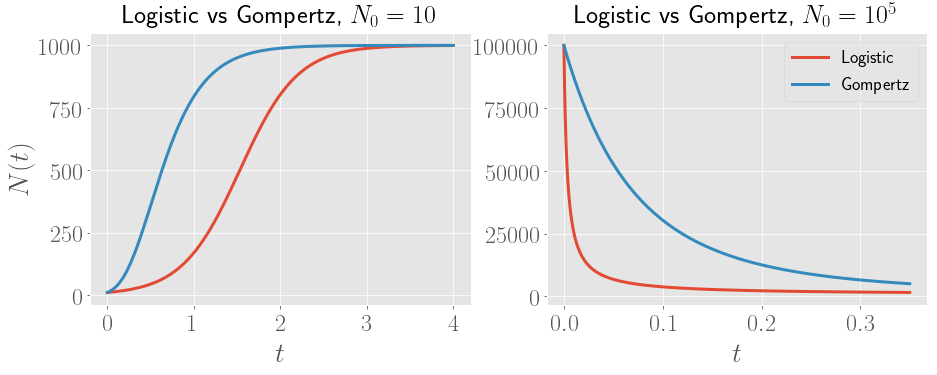

In [15]:
## Create one large figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))

# Define lists to simplify subplotting
ax_list = [ax1, ax2]
N0_list = [10, 10**5]
t_list = [np.arange(0, 4, 0.001), np.arange(0, 0.35, 10**(-4))]
title_list = [r'Logistic vs Gompertz, $N_0 = 10$', r'Logistic vs Gompertz, $N_0 = 10^5$']

for i in [0, 1]:
    t = t_list[i]; N0 = N0_list[i]; title = title_list[i]; ax = ax_list[i]
    
    # Obtain exact values
    N_logistic = logistic(t, N0 = N0)
    N_gompertz = gompertz(t, N0 = N0)

    # Plot it
    ax.plot(t, N_logistic, label = 'Logistic')
    ax.plot(t, N_gompertz, label = 'Gompertz')
    
    ax.set_title(title)
    ax.set_xlabel(r'$t$')


ax1.set_ylabel(r'$N(t)$')
plt.legend(fontsize = 18)
plt.savefig('logistic_vs_gompertz.pdf', bbox_inches = 'tight')
plt.show()

Compare the two right hand sides:

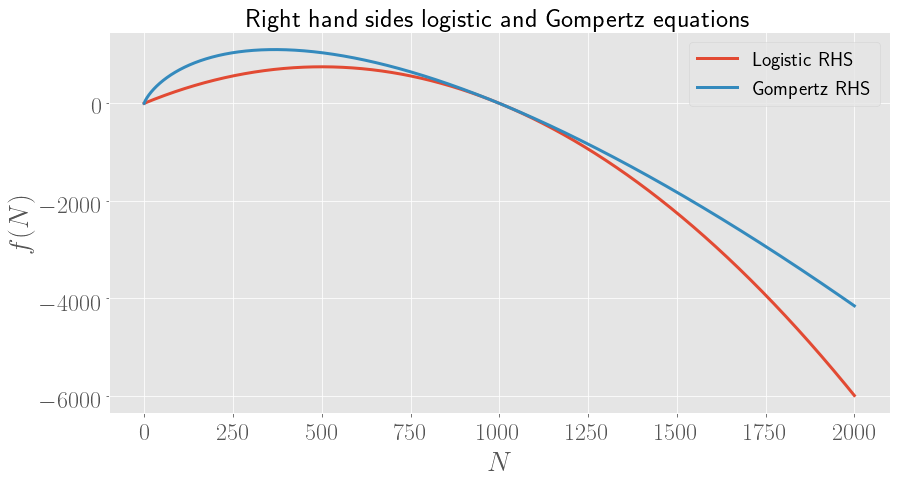

In [16]:
# Change figure size for this plot
plt.figure(figsize = (14,7))

# Get values 
N_vals = np.arange(0.0001, 2000, 0.1)
f_vals = logistic_func(N_vals)
f_vals2 = gompertz_func(N_vals)

# Plot it
plt.plot(N_vals, f_vals,   label = r'Logistic RHS')
plt.plot(N_vals, f_vals2, label = r'Gompertz RHS')

# Make fancy, save and show
plt.title('Right hand sides logistic and Gompertz equations')
plt.xlabel(r'$N$')
plt.ylabel(r'$f(N)$')
plt.legend(fontsize = 20)
plt.savefig('logistic_vs_gompertz_potentials.pdf', bbox_inches = 'tight')
plt.show()

The point of intersection between the two curves is $x = K$, which is $1000$ for the plot above.

## 1.4 - Delays

### 1.4.1 - Numerical solutions

In [17]:
def logistic_ODE_delay(t_vals, N0, alpha = 1, K = 10**3):
    '''Solves the logistic ODE with a delay. We assume that t_vals[0] = -T '''
    
    y_vals = []
    # Count entries in t_vals, to get N(t - T) values by calling elements from y_vals
    index = 0 
    DeltaT = abs(t_vals[1] - t_vals[0])
    
    for t in t_vals:
        if t <= 0: 
            # As long as t <= 0, initial condition is added: count each entry
            y_vals.append(N0)
            index += 1
            
        else:
            # Solve the ODE as before, but use the delay
            val = y_vals[-1] + (alpha*y_vals[-1]*(1 - y_vals[-index]/K))*DeltaT
            y_vals.append(val)
            
    return y_vals

Define delay time $T$ here:

In [18]:
T = 3

First look at $N_0 = 10$ only:

In [19]:
N0 = 10
t = np.arange(-T, 50, 0.001)
y = logistic_ODE_delay(t, N0)

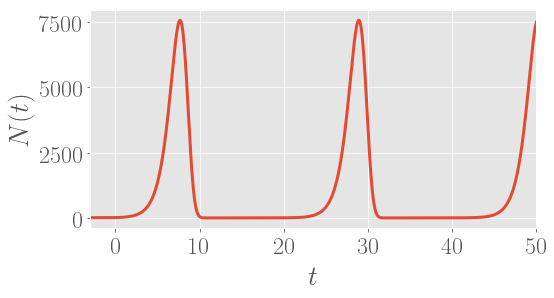

In [20]:
plt.plot(t, y)
plt.xlabel(r'$t$')
plt.xlim(-3, 50)
plt.ylabel(r'$N(t)$')
plt.show()

Oscillations start appearing already around $t = 8$.

Now look at $N_0 = 10^5$ only:

In [21]:
N0 = 10**5
t2 = np.arange(-T, 420, 0.001)
y2 = logistic_ODE_delay(t2, N0)

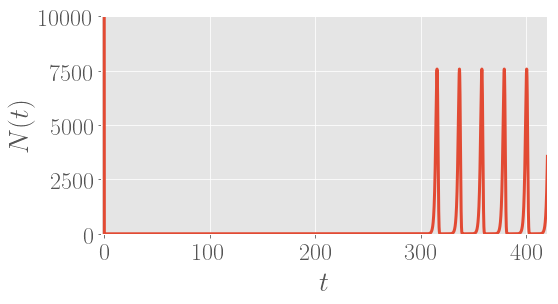

In [22]:
plt.plot(t2, y2)
plt.ylim(0, 10000)
plt.xlim(-3, 420)
plt.xlabel(r'$t$')
plt.ylabel(r'$N(t)$')
plt.show()

Oscillations appear later than previous case, around $t = 300, 310$.

Combine the two plots above in a single one for the report:

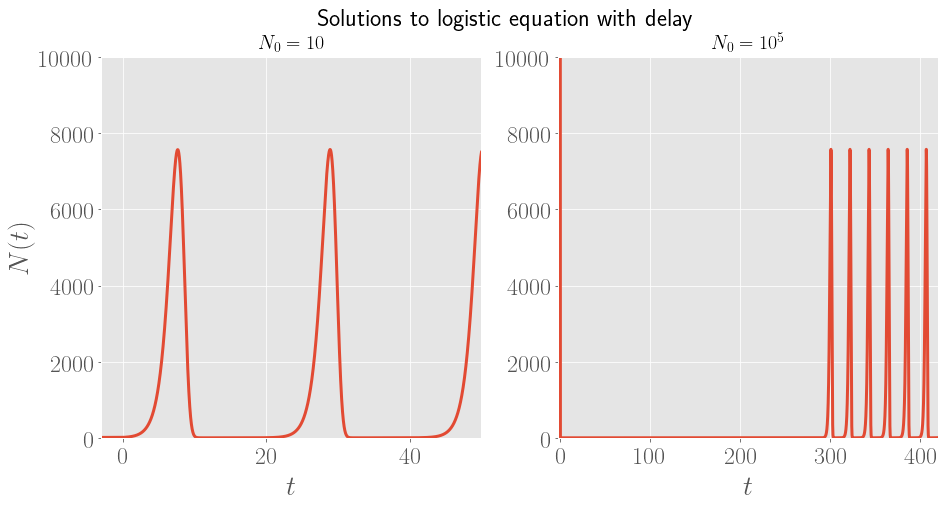

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7))

# Define lists to simplify subplotting

ax_list = [ax1, ax2]
N0_list = [10, 10**5]
t_list = [np.arange(-T, 50, 0.001), np.arange(-T, 420, 10**(-4))]
title_list = [r'$N_0 = 10$', r'$N_0 = 10^5$']

for i in [0, 1]:
    ax = ax_list[i]; N0 = N0_list[i]; t = t_list[i]; title = title_list[i]
    
    # Get values
    y = logistic_ODE_delay(t, N0)
    
    # Plot them
    ax.plot(t, y)
    
    ax.set_title(title, fontsize = 20)
    ax.set_xlabel(r'$t$')
    ax.set_ylim(0, 10000)
    
ax1.set_ylabel(r'$N(t)$')
ax1.set_xlim(-T, 50)
ax2.set_xlim(-T, 420)


fig.suptitle('Solutions to logistic equation with delay', fontsize = 24)
plt.savefig('logistic_delay_solutions.pdf', bbox_inches = 'tight')
plt.show()

### 1.4.2 - Long time behaviour

Now look at the long time behaviour: both solutions should be identical, up to a phase shift.

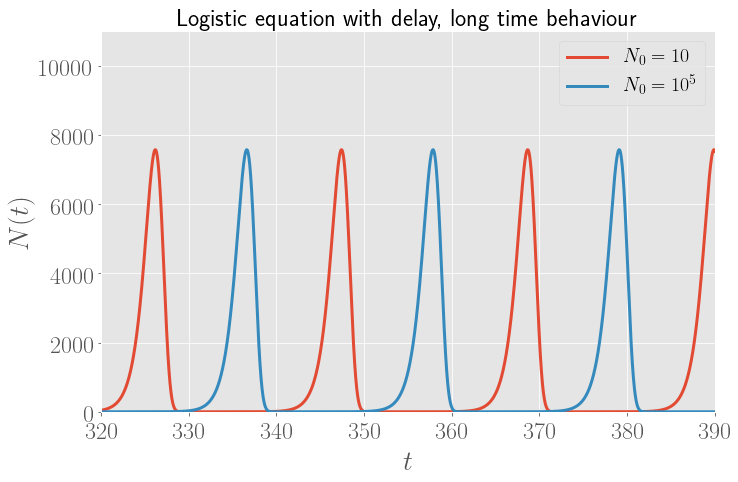

In [24]:
## Create one large figure
plt.figure(figsize = (11,7))

# Define lists to simplify subplotting
N0_list = [10, 10**5]
t_list = [np.arange(-T, 500, 0.001), np.arange(-T, 500, 0.001)]
label_list = [r'$N_0 = 10$', r'$N_0 = 10^5$']

for i in [0, 1]:
    t = t_list[i]; N0 = N0_list[i]; title = title_list[i]; label = label_list[i]
    
    # Obtain values
    y = logistic_ODE_delay(t, N0)

    # Plot it
    plt.plot(t, y, label = label)
    
# Make fancy, save and show
plt.xlabel(r'$t$')
plt.ylabel(r'$N(t)$')
plt.xlim(320, 390)
plt.ylim(0, 11000)
plt.title('Logistic equation with delay, long time behaviour', fontsize = 24)
plt.legend(fontsize = 20)
plt.savefig('logistic_delay_long_time.pdf', bbox_inches = 'tight')
plt.show()